In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [283]:
df = pd.read_csv("cardio_train_new.csv")

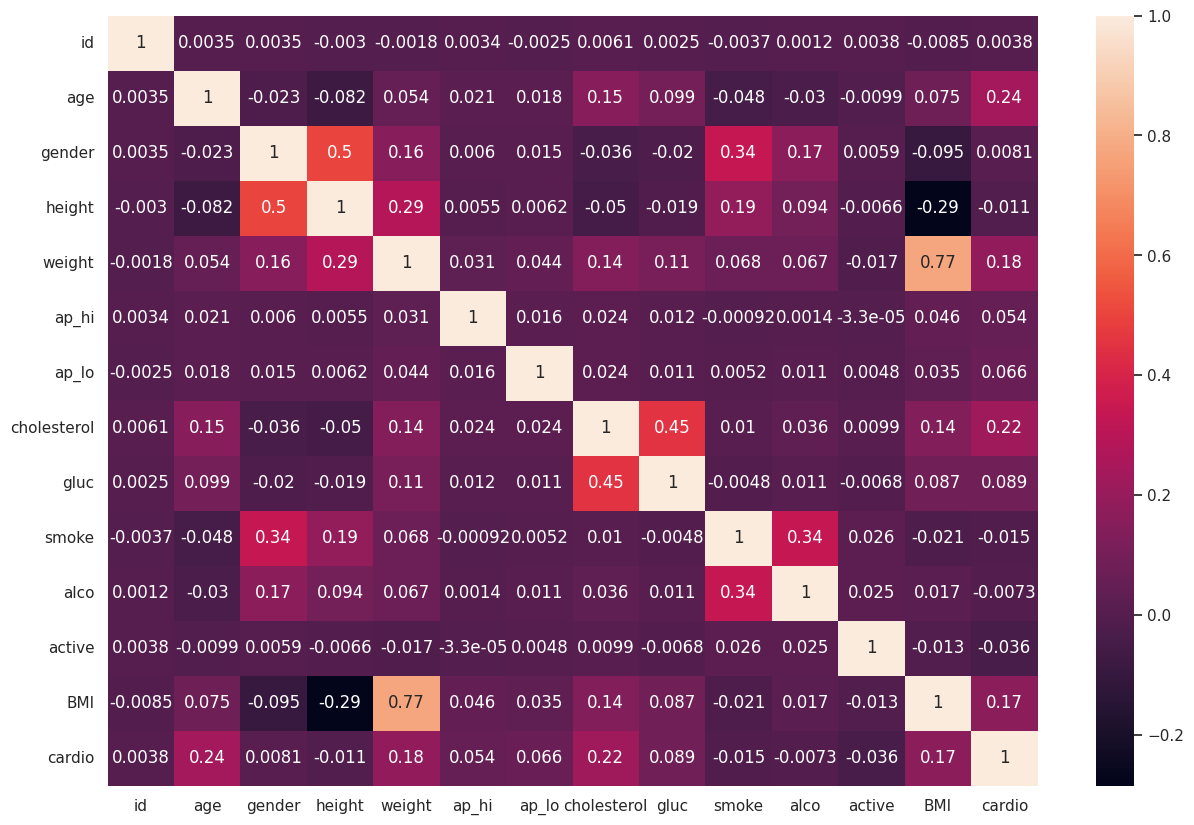

In [284]:
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            annot=True, );

In [285]:
df["BMI"] = round(df.weight/(df.height/100)**2, 2)
df.age = round(df.age/365,1)
df = df.drop("id", axis=1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
0,50.4,2,168,62.0,110,80,1,1,0,0,1,21.97,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,34.93,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,23.51,1
3,48.3,2,169,82.0,150,100,1,1,0,0,1,28.71,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.7,2,168,76.0,120,80,1,1,1,0,1,26.93,0
69996,61.9,1,158,126.0,140,90,2,2,0,0,1,50.47,1
69997,52.2,2,183,105.0,180,90,3,1,0,1,0,31.35,1
69998,61.5,1,163,72.0,135,80,1,2,0,0,0,27.10,1


In [286]:
x = df.drop("cardio", axis=1)
y = df.cardio

In [287]:
x.shape, y.shape

((70000, 12), (70000,))

In [288]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [289]:
def make_model(model,x,y):

  clf = model(n_jobs=1)
  clf.fit(x, y)
  return clf

In [290]:
def accuracy(model,x,y):
  r2 = round(r2_score(x,y), 2)
  acuury = round(accuracy_score(x,y)*100, 2)
  f1 = round(f1_score(x,y), 2)
  print("the accuracy score of " + model + " is:")
  print(str(acuury)+"%")
  print("the f1 score of " + model + " is:")
  print(str(f1))
  print("the r2 score of " + model + " is:")
  print(str(r2))
  print("the Confusion Matrix Display of " + model + " is:")
  print(confusion_matrix(x,y))


In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

XGB_clf = make_model(XGBClassifier,x_train,y_train)
RF_clf = make_model(RandomForestClassifier,x_train,y_train)
KN_clf = make_model(KNeighborsClassifier,x_train,y_train)


XGB_pre = XGB_clf.predict(x_test)
RF_pre = RF_clf.predict(x_test)
KN_pre = KN_clf.predict(x_test)

In [292]:
accuracy("XGB",XGB_pre,y_test)

the accuracy score of XGB is:
73.81%
the f1 score of XGB is:
0.73
the r2 score of XGB is:
-0.05
the Confusion Matrix Display of XGB is:
[[5425 2104]
 [1563 4908]]


In [293]:
accuracy("RF",RF_pre,y_test)

the accuracy score of RF is:
71.16%
the f1 score of RF is:
0.71
the r2 score of RF is:
-0.15
the Confusion Matrix Display of RF is:
[[5019 2069]
 [1969 4943]]


In [294]:
accuracy("KN",KN_pre,y_test)

the accuracy score of KN is:
68.56%
the f1 score of KN is:
0.68
the r2 score of KN is:
-0.26
the Confusion Matrix Display of KN is:
[[4945 2358]
 [2043 4654]]


In [295]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [296]:
# Setup GridSearchCV
#gs_clf = GridSearchCV(estimator=XGB_clf,
 #                     param_grid=grid_2,
  #                    cv=5,
   #                   verbose=2)

# Fit the GridSearchCV version of clf
#gs_clf.fit(x_train, y_train);

In [297]:
#gs_clf.best_params_

In [298]:
#accuracy("GS",gs_clf.predict(x_test),y_test)

In [299]:
from xgboost import plot_importance
feature_importance_scores = XGB_clf.feature_importances_
feature_importance_scores

array([0.05571519, 0.0208953 , 0.02069444, 0.02539466, 0.5175227 ,
       0.02787975, 0.16248938, 0.03442602, 0.03939352, 0.03731234,
       0.03473605, 0.02354063], dtype=float32)

In [300]:
predicted_probabilities = XGB_clf.predict_proba(x_test)
predicted_probabilities

array([[0.17899454, 0.82100546],
       [0.15869808, 0.8413019 ],
       [0.35036308, 0.6496369 ],
       ...,
       [0.46782148, 0.5321785 ],
       [0.21722496, 0.78277504],
       [0.17196351, 0.8280365 ]], dtype=float32)

In [301]:
probability_df = pd.DataFrame(predicted_probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])
probability_df.isna().sum()
probability_df
y_test

46730    1
48393    1
41416    1
34506    1
43725    0
        ..
21525    1
16276    1
24390    0
28061    1
63452    1
Name: cardio, Length: 14000, dtype: int64

In [302]:
confusion_matrix(y_test, RF_pre)


array([[5019, 1969],
       [2069, 4943]])

In [303]:
y_test2 = pd.DataFrame(y_test)
y_test2.reset_index(inplace=True)
y_test2

,index,cardio
0,46730,1
1,48393,1
2,41416,1
3,34506,1
4,43725,0
...,...,...
13995,21525,1
13996,16276,1
13997,24390,0
13998,28061,1


In [304]:
test_data_with_probabilities=pd.concat([y_test2, probability_df], axis=1)
test_data_with_probabilities.drop("index", axis=1, inplace=True)
test_data_with_probabilities

,cardio,Probability_Class_0,Probability_Class_1
0,1,0.178995,0.821005
1,1,0.158698,0.841302
2,1,0.350363,0.649637
3,1,0.633584,0.366416
4,0,0.773780,0.226220
...,...,...,...
13995,1,0.543478,0.456522
13996,1,0.693112,0.306888
13997,0,0.467821,0.532179
13998,1,0.217225,0.782775


In [307]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
feature_names = ["BMI","ap_hi",("BMI","ap_hi")]
PartialDependenceDisplay.from_estimator(RF_clf, x, feature_names)

KeyboardInterrupt: ignored